In [50]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
from sklearn.datasets import make_blobs

from sklearn import cluster

In [39]:
X, y = make_blobs(n_features=2, centers=2, cluster_std=2.0)

In [40]:
# X = np.array([[1, 2],
#               [1.5, 1.8],
#               [5, 8 ],
#               [8, 8],
#               [1, 0.6],
#               [9,11],
#               [1,3],
#               [8,9],
#               [0,3],
#               [5,4],
#               [6,4],])

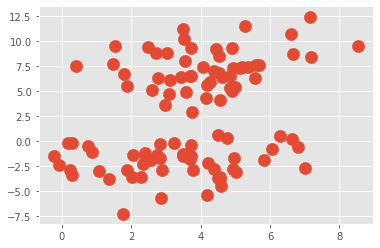

In [41]:
plt.scatter(X[:,0], X[:,1], s=150)

In [42]:
colors = 10*["g","r","c","b","k"]

In [43]:
class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

In [44]:
clf = KMeans()
clf.fit(X)

18.787324249788284


In [51]:
skclf = cluster.KMeans(n_clusters=2)

In [57]:
y = skclf.fit_predict(X)

In [58]:
skclf.cluster_centers_

array([[ 3.22538411, -2.07549129],
       [ 4.18959402,  7.30101618]])

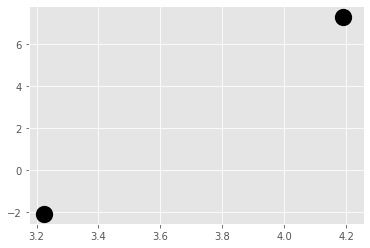

In [45]:
for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)

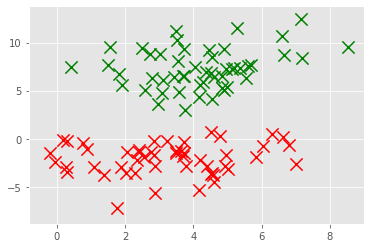

In [46]:
for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)

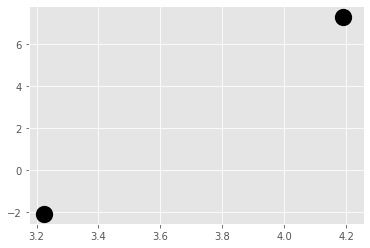

In [55]:
for centroid in skclf.cluster_centers_:
    plt.scatter(centroid[0], centroid[1],
                marker="o", color="k", s=150, linewidths=5)

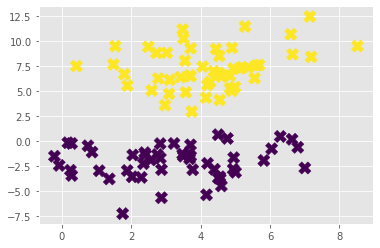

In [69]:
plt.scatter(X[:, 0], X[:, 1], c=list(y), marker='X', s=150)